In [13]:
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import play as lib
from binance.client import Client
from IPython.display import display

In [14]:
from datetime import datetime
import os

print("OS: ", os.uname())
print("Now: ", datetime.utcnow())

OS:  posix.uname_result(sysname='Darwin', nodename='192.168.1.68', release='21.6.0', version='Darwin Kernel Version 21.6.0: Mon Aug 22 20:17:10 PDT 2022; root:xnu-8020.140.49~2/RELEASE_X86_64', machine='x86_64')
Now:  2023-01-27 04:38:35.972045


## Fetch data

In [15]:
client = lib.get_client()
ONE_HOUR_IN_MS=60 * 60 * 1000
ONE_DAY_IN_MS=24 * ONE_HOUR_IN_MS
ONE_MONTH_IN_MS=30 * ONE_DAY_IN_MS

PAIR_DIC = {
  "MATIC": ["MATICUSDT", './out/MATICUSDT.pkl'],
  "BNB": ["BNBUSDT", './out/BNBUSDT.pkl'],
  "AVAX": ["AVAXUSDT", './out/AVAXUSDT.pkl'],
  "BTC": ["BTCUSDT", './out/BTCUSDT.pkl'],
  "ETH": ["ETHUSDT", './out/ETHUSDT.pkl']
}

In [16]:
def pull_data(PAIR_NAME: str, DATA_FILE: str):
  now = math.floor(time.time() * 1000)
  df = lib.fetch_price(client, PAIR_NAME, now - 3 * ONE_MONTH_IN_MS, now, Client.KLINE_INTERVAL_1HOUR)
  display(df)
  display(df.describe())
  f = plt.figure()
  f.set_figwidth(24)
  plt.plot(df["close_time"], df["close_price"])
  df.to_pickle(DATA_FILE)
  display("Saved to: {0}".format(DATA_FILE))


### MATIC

,close_time,close_price
0,2022-10-29 05:59:59.999,0.9380
1,2022-10-29 06:59:59.999,0.9395
2,2022-10-29 07:59:59.999,0.9431
3,2022-10-29 08:59:59.999,0.9522
4,2022-10-29 09:59:59.999,0.9483
...,...,...
2155,2023-01-27 00:59:59.999,1.0935
2156,2023-01-27 01:59:59.999,1.0762
2157,2023-01-27 02:59:59.999,1.0754
2158,2023-01-27 03:59:59.999,1.0789


,close_price
count,2160.000000
mean,0.897847
std,0.100394
min,0.748400
25%,0.809050
50%,0.890050
75%,0.941550
max,1.273200


'Saved to: ./out/pair_MATICUSDT.pkl'

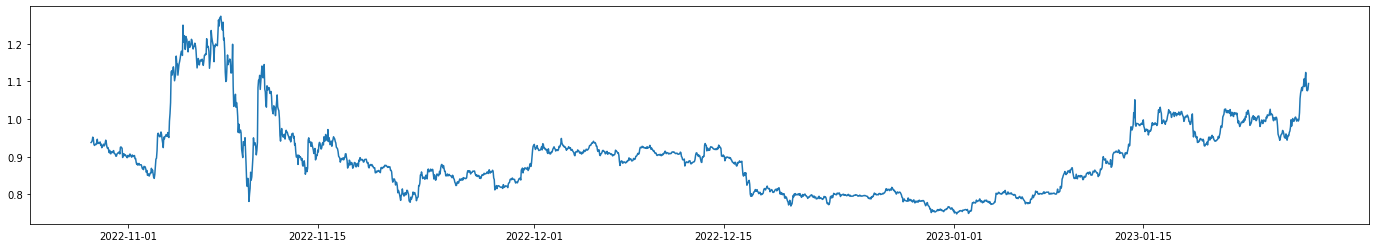

In [17]:
pull_data(PAIR_DIC["MATIC"][0], PAIR_DIC["MATIC"][1])

### BNB

,close_time,close_price
0,2022-10-29 05:59:59.999,303.0
1,2022-10-29 06:59:59.999,301.9
2,2022-10-29 07:59:59.999,302.3
3,2022-10-29 08:59:59.999,306.5
4,2022-10-29 09:59:59.999,306.0
...,...,...
2155,2023-01-27 00:59:59.999,302.3
2156,2023-01-27 01:59:59.999,300.4
2157,2023-01-27 02:59:59.999,302.3
2158,2023-01-27 03:59:59.999,302.6


,close_price
count,2160.000000
mean,282.857731
std,27.884817
min,225.400000
25%,258.875000
50%,286.000000
75%,301.200000
max,375.400000


'Saved to: ./out/pair_BNBUSDT.pkl'

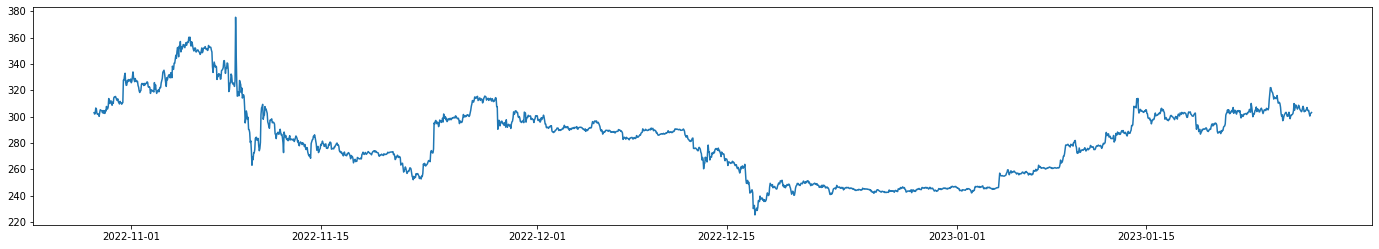

In [18]:
pull_data(PAIR_DIC["BNB"][0], PAIR_DIC["BNB"][1])

### AVAX

,close_time,close_price
0,2022-10-29 05:59:59.999,18.47
1,2022-10-29 06:59:59.999,18.34
2,2022-10-29 07:59:59.999,18.49
3,2022-10-29 08:59:59.999,18.83
4,2022-10-29 09:59:59.999,18.66
...,...,...
2155,2023-01-27 00:59:59.999,17.89
2156,2023-01-27 01:59:59.999,17.61
2157,2023-01-27 02:59:59.999,17.83
2158,2023-01-27 03:59:59.999,17.83


,close_price
count,2160.000000
mean,14.026139
std,2.495471
min,10.670000
25%,11.950000
50%,13.160000
75%,16.080000
max,20.260000


'Saved to: ./out/AVAXUSDT.pkl'

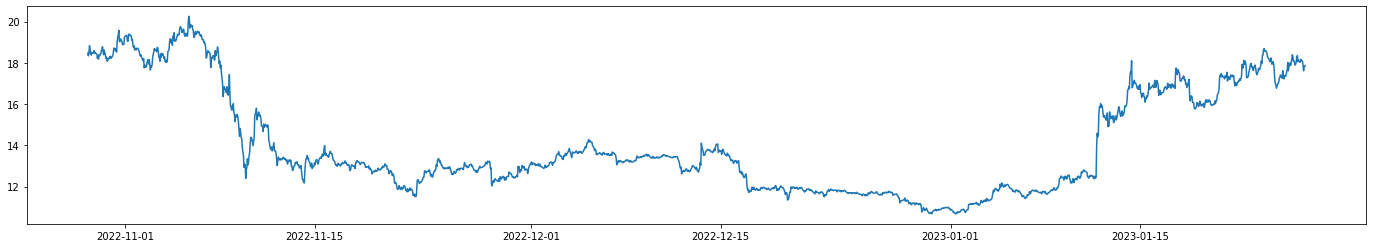

In [19]:
pull_data(PAIR_DIC["AVAX"][0], PAIR_DIC["AVAX"][1])

### BTC

,close_time,close_price
0,2022-10-29 05:59:59.999,20655.56
1,2022-10-29 06:59:59.999,20685.97
2,2022-10-29 07:59:59.999,20772.27
3,2022-10-29 08:59:59.999,20922.87
4,2022-10-29 09:59:59.999,20955.25
...,...,...
2155,2023-01-27 00:59:59.999,22925.50
2156,2023-01-27 01:59:59.999,22647.48
2157,2023-01-27 02:59:59.999,22781.67
2158,2023-01-27 03:59:59.999,22772.62


,close_price
count,2160.000000
mean,18074.889051
std,2068.745063
min,15649.520000
25%,16702.150000
50%,16946.950000
75%,20260.152500
max,23592.550000


'Saved to: ./out/BTCUSDT.pkl'

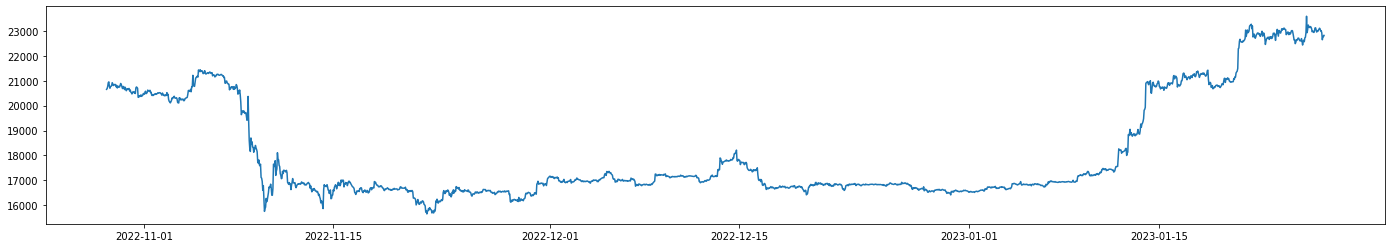

In [20]:
pull_data(PAIR_DIC["BTC"][0], PAIR_DIC["BTC"][1])

### ETH

,close_time,close_price
0,2022-10-29 05:59:59.999,1580.73
1,2022-10-29 06:59:59.999,1583.46
2,2022-10-29 07:59:59.999,1594.77
3,2022-10-29 08:59:59.999,1628.85
4,2022-10-29 09:59:59.999,1631.94
...,...,...
2155,2023-01-27 00:59:59.999,1588.87
2156,2023-01-27 01:59:59.999,1562.81
2157,2023-01-27 02:59:59.999,1570.51
2158,2023-01-27 03:59:59.999,1565.73


,close_price
count,2160.000000
mean,1329.645866
std,161.132947
min,1081.190000
25%,1211.877500
50%,1263.310000
75%,1524.882500
max,1663.270000


'Saved to: ./out/ETHUSDT.pkl'

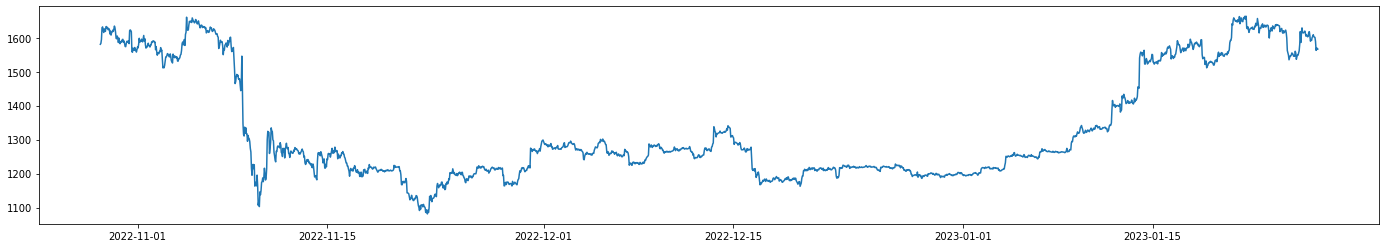

In [21]:
pull_data(PAIR_DIC["ETH"][0], PAIR_DIC["ETH"][1])

# Prophet

In [22]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


In [23]:
def prophet_model(data_path: str):
  display("DATA_SOURCE: {0}".format(data_path))
  df = pd.read_pickle(data_path)
  df = df.rename(columns={"close_time": "ds", "close_price": "y"})
  m = Prophet()
  m.fit(df)

  future = m.make_future_dataframe(periods=5)
  display(future.tail())
  forecast = m.predict(future)
  display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

  fig1 = m.plot(forecast)
  fig1.set_figwidth(24)

  fig2 = m.plot_components(forecast)
  fig2.set_figwidth(24)

  fig = m.plot(forecast)
  fig.set_figwidth(24)
  a = add_changepoints_to_plot(fig.gca(), m, forecast)

  return m,future,forecast
  

'DATA_SOURCE: ./out/pair_MATICUSDT.pkl'

11:38:43 - cmdstanpy - INFO - Chain [1] start processing
11:38:44 - cmdstanpy - INFO - Chain [1] done processing


,ds
2160,2023-01-28 04:59:59.999
2161,2023-01-29 04:59:59.999
2162,2023-01-30 04:59:59.999
2163,2023-01-31 04:59:59.999
2164,2023-02-01 04:59:59.999


,ds,yhat,yhat_lower,yhat_upper
2160,2023-01-28 04:59:59.999,1.083690,1.029668,1.127093
2161,2023-01-29 04:59:59.999,1.085370,1.034982,1.136812
2162,2023-01-30 04:59:59.999,1.087844,1.033527,1.141219
2163,2023-01-31 04:59:59.999,1.110261,1.049361,1.173580
2164,2023-02-01 04:59:59.999,1.098948,1.023464,1.170220


(<prophet.forecaster.Prophet at 0x126d27580>,
                           ds
 0    2022-10-29 05:59:59.999
 1    2022-10-29 06:59:59.999
 2    2022-10-29 07:59:59.999
 3    2022-10-29 08:59:59.999
 4    2022-10-29 09:59:59.999
 ...                      ...
 2160 2023-01-28 04:59:59.999
 2161 2023-01-29 04:59:59.999
 2162 2023-01-30 04:59:59.999
 2163 2023-01-31 04:59:59.999
 2164 2023-02-01 04:59:59.999
 
 [2165 rows x 1 columns],
                           ds     trend  yhat_lower  yhat_upper  trend_lower  \
 0    2022-10-29 05:59:59.999  0.903060    0.868758    0.968879     0.903060   
 1    2022-10-29 06:59:59.999  0.902945    0.865756    0.967991     0.902945   
 2    2022-10-29 07:59:59.999  0.902830    0.869638    0.966694     0.902830   
 3    2022-10-29 08:59:59.999  0.902715    0.868580    0.965757     0.902715   
 4    2022-10-29 09:59:59.999  0.902601    0.871741    0.968576     0.902601   
 ...                      ...       ...         ...         ...          ...   
 2160 

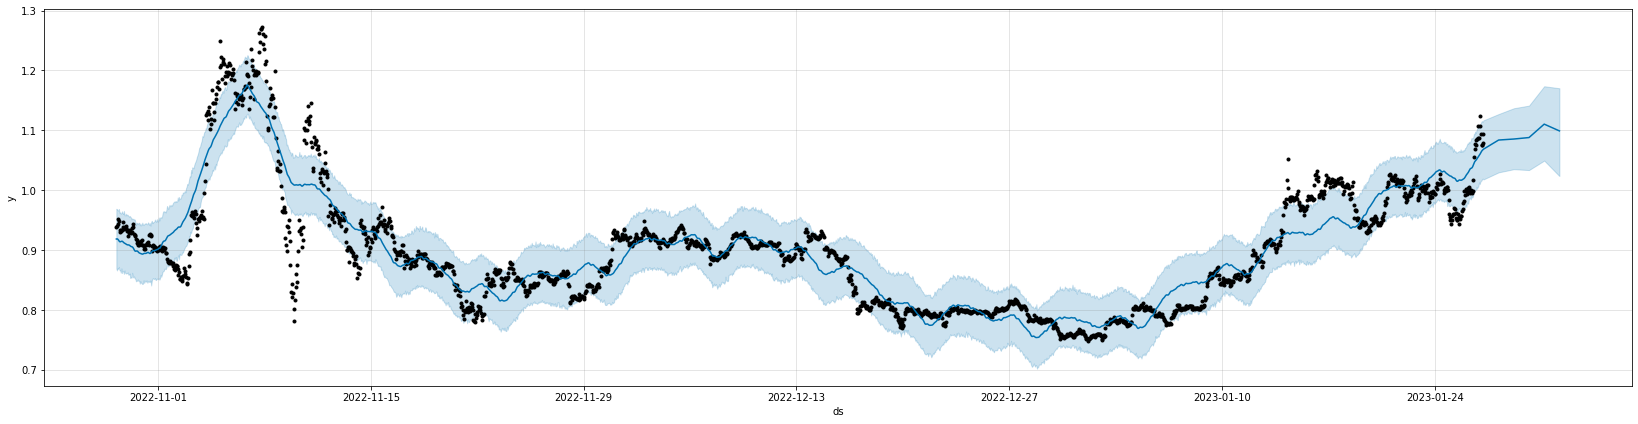

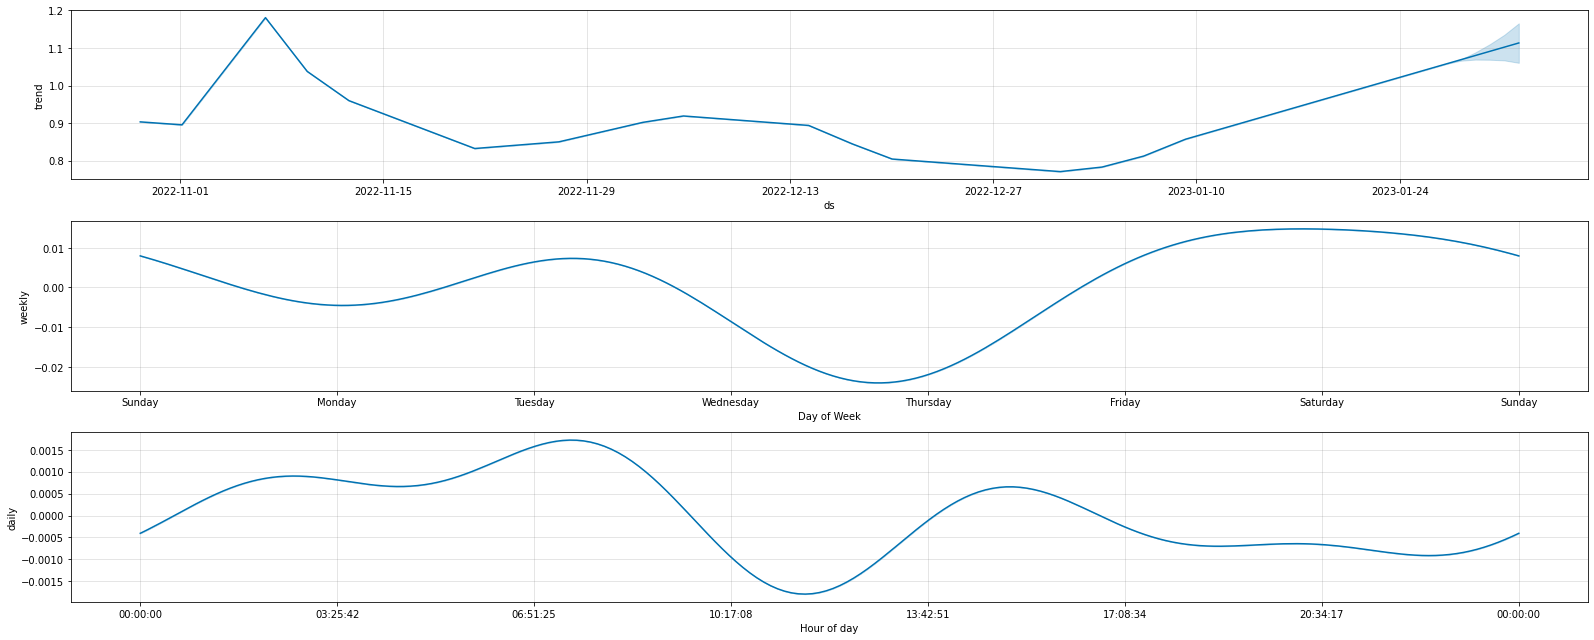

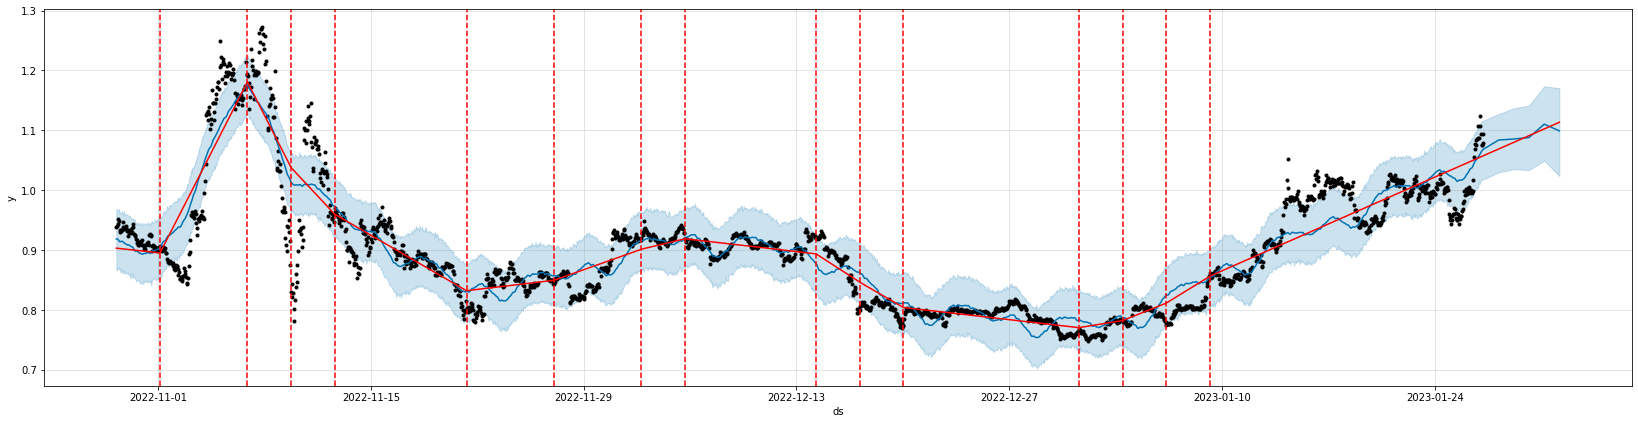

In [24]:
prophet_model(PAIR_DIC["MATIC"][1])

'DATA_SOURCE: ./out/pair_BNBUSDT.pkl'

11:38:46 - cmdstanpy - INFO - Chain [1] start processing
11:38:47 - cmdstanpy - INFO - Chain [1] done processing


,ds
2160,2023-01-28 04:59:59.999
2161,2023-01-29 04:59:59.999
2162,2023-01-30 04:59:59.999
2163,2023-01-31 04:59:59.999
2164,2023-02-01 04:59:59.999


,ds,yhat,yhat_lower,yhat_upper
2160,2023-01-28 04:59:59.999,316.511585,308.174686,325.197484
2161,2023-01-29 04:59:59.999,318.645808,308.995242,327.598938
2162,2023-01-30 04:59:59.999,318.677386,307.402763,330.134916
2163,2023-01-31 04:59:59.999,320.215206,305.366904,333.313120
2164,2023-02-01 04:59:59.999,322.319360,302.157477,341.817870


(<prophet.forecaster.Prophet at 0x126bc2dc0>,
                           ds
 0    2022-10-29 05:59:59.999
 1    2022-10-29 06:59:59.999
 2    2022-10-29 07:59:59.999
 3    2022-10-29 08:59:59.999
 4    2022-10-29 09:59:59.999
 ...                      ...
 2160 2023-01-28 04:59:59.999
 2161 2023-01-29 04:59:59.999
 2162 2023-01-30 04:59:59.999
 2163 2023-01-31 04:59:59.999
 2164 2023-02-01 04:59:59.999
 
 [2165 rows x 1 columns],
                           ds       trend  yhat_lower  yhat_upper  trend_lower  \
 0    2022-10-29 05:59:59.999  301.740138  295.079594  311.156245   301.740138   
 1    2022-10-29 06:59:59.999  302.016804  295.826986  311.859683   302.016804   
 2    2022-10-29 07:59:59.999  302.293470  295.997783  312.108154   302.293470   
 3    2022-10-29 08:59:59.999  302.570136  296.443760  312.740966   302.570136   
 4    2022-10-29 09:59:59.999  302.846801  296.505934  312.925736   302.846801   
 ...                      ...         ...         ...         ...         

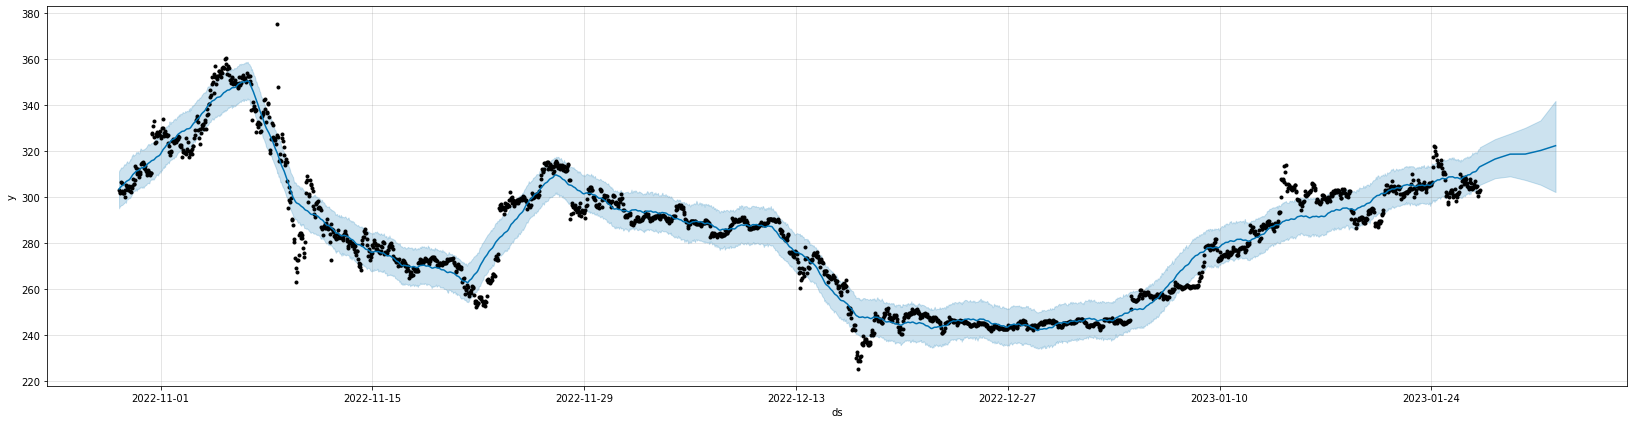

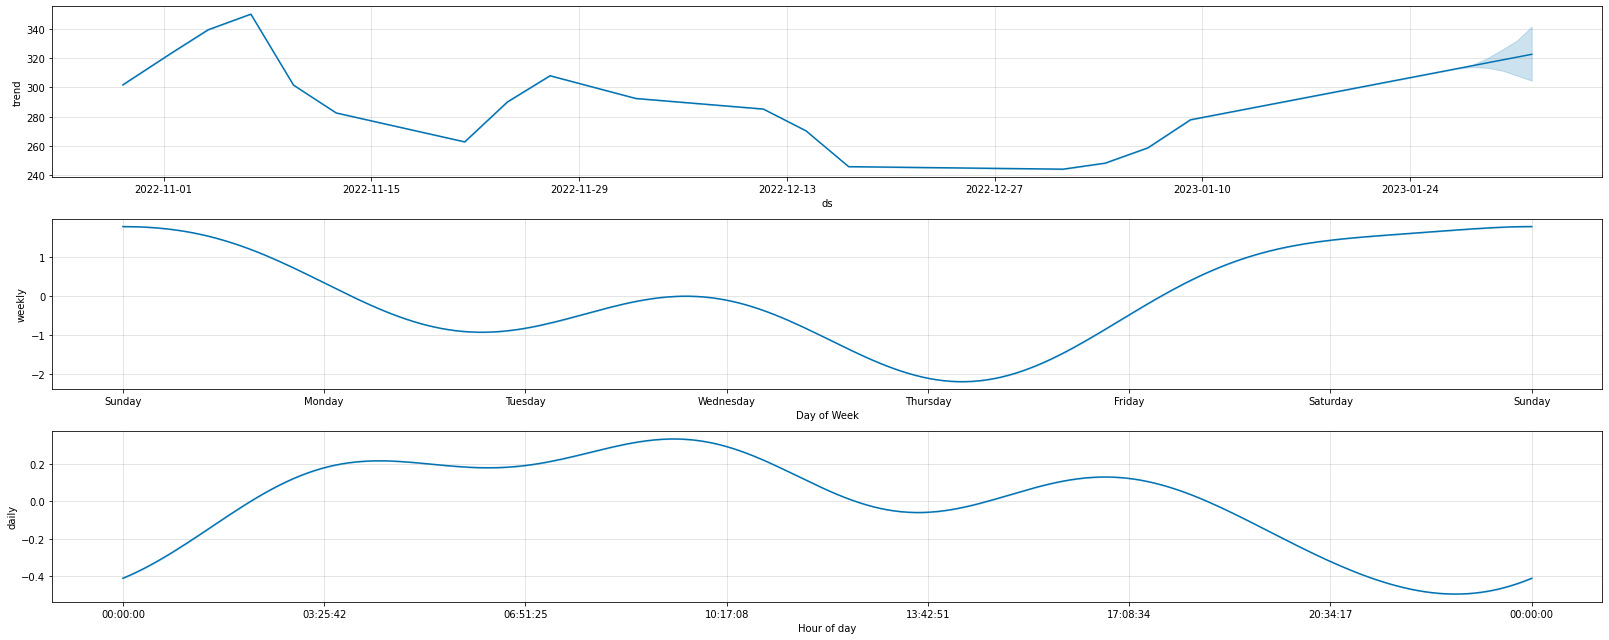

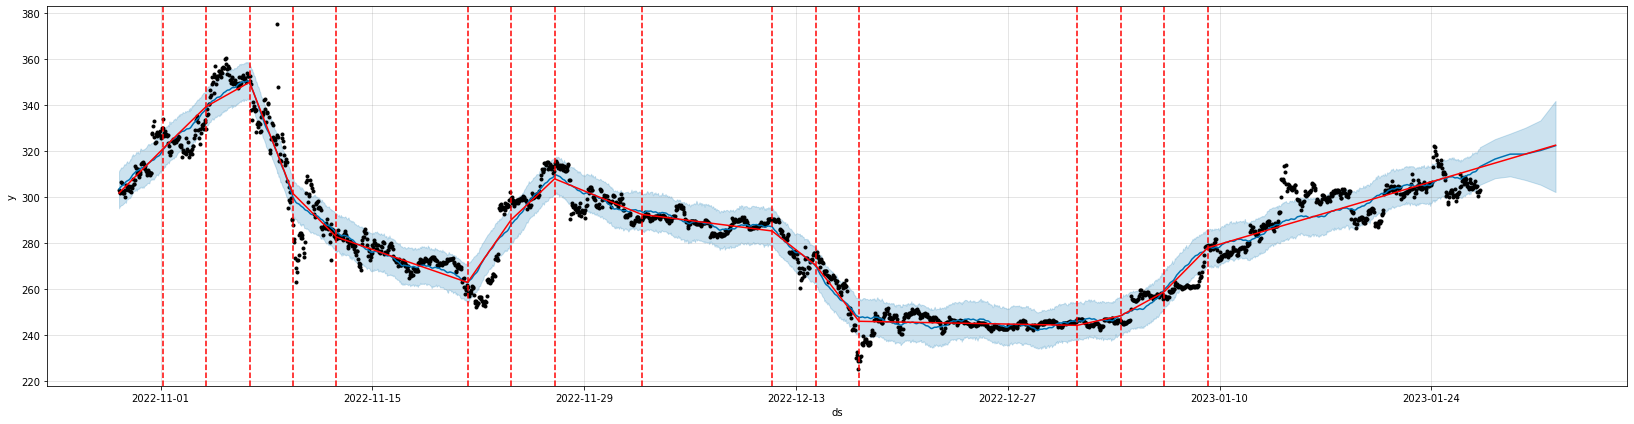

In [25]:
prophet_model(PAIR_DIC["BNB"][1])


'DATA_SOURCE: ./out/AVAXUSDT.pkl'

11:38:49 - cmdstanpy - INFO - Chain [1] start processing
11:38:50 - cmdstanpy - INFO - Chain [1] done processing


,ds
2160,2023-01-28 04:59:59.999
2161,2023-01-29 04:59:59.999
2162,2023-01-30 04:59:59.999
2163,2023-01-31 04:59:59.999
2164,2023-02-01 04:59:59.999


,ds,yhat,yhat_lower,yhat_upper
2160,2023-01-28 04:59:59.999,19.537139,18.743559,20.374914
2161,2023-01-29 04:59:59.999,19.841047,19.000316,20.622591
2162,2023-01-30 04:59:59.999,19.995683,19.118645,20.869849
2163,2023-01-31 04:59:59.999,20.390918,19.543607,21.314322
2164,2023-02-01 04:59:59.999,20.560689,19.392414,21.546136


(<prophet.forecaster.Prophet at 0x126d273d0>,
                           ds
 0    2022-10-29 05:59:59.999
 1    2022-10-29 06:59:59.999
 2    2022-10-29 07:59:59.999
 3    2022-10-29 08:59:59.999
 4    2022-10-29 09:59:59.999
 ...                      ...
 2160 2023-01-28 04:59:59.999
 2161 2023-01-29 04:59:59.999
 2162 2023-01-30 04:59:59.999
 2163 2023-01-31 04:59:59.999
 2164 2023-02-01 04:59:59.999
 
 [2165 rows x 1 columns],
                           ds      trend  yhat_lower  yhat_upper  trend_lower  \
 0    2022-10-29 05:59:59.999  18.418650   17.846853   19.399925    18.418650   
 1    2022-10-29 06:59:59.999  18.422542   17.749315   19.353510    18.422542   
 2    2022-10-29 07:59:59.999  18.426434   17.774157   19.354973    18.426434   
 3    2022-10-29 08:59:59.999  18.430327   17.804670   19.440905    18.430327   
 4    2022-10-29 09:59:59.999  18.434219   17.796021   19.410226    18.434219   
 ...                      ...        ...         ...         ...          ...   

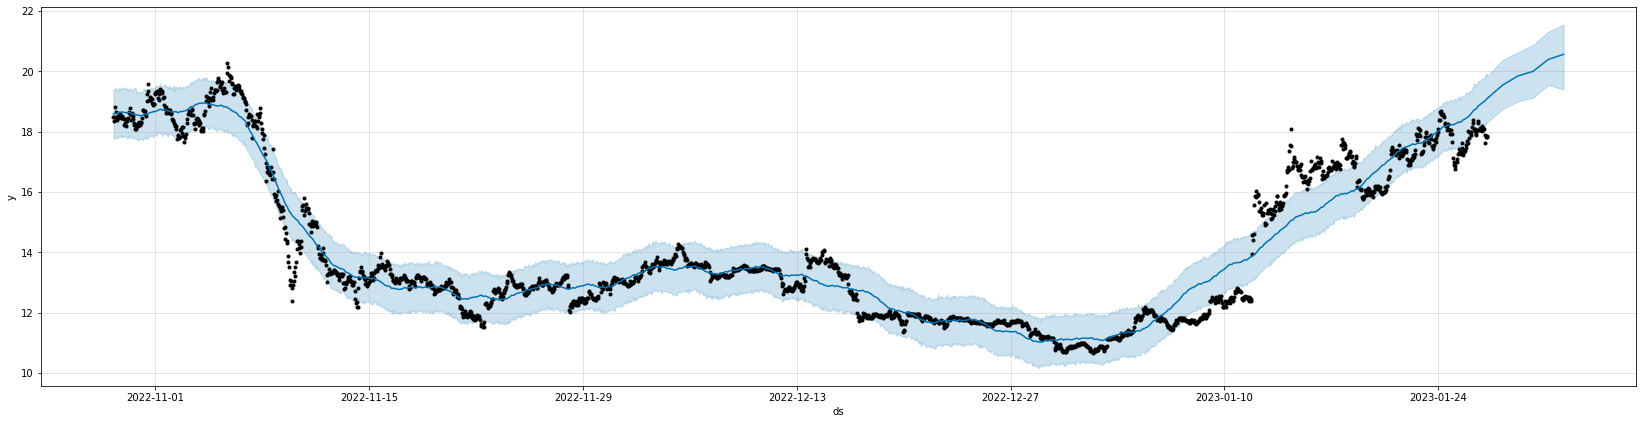

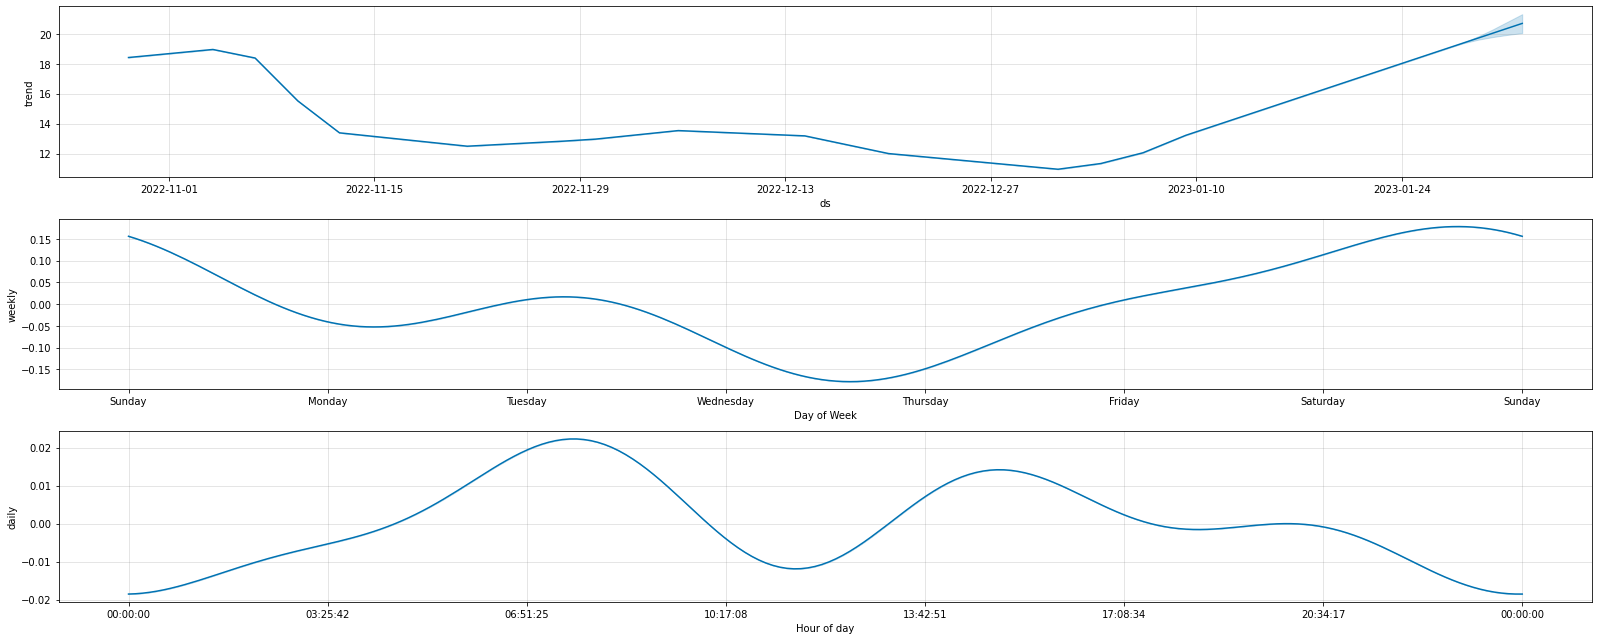

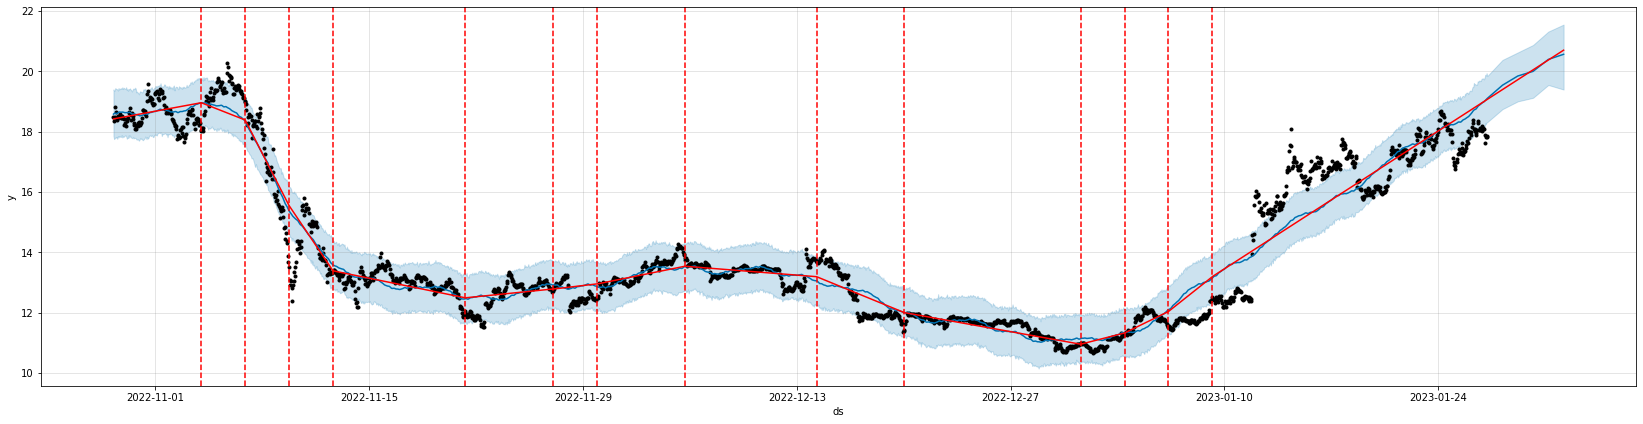

In [26]:
prophet_model(PAIR_DIC["AVAX"][1])

'DATA_SOURCE: ./out/BTCUSDT.pkl'

11:38:52 - cmdstanpy - INFO - Chain [1] start processing
11:38:54 - cmdstanpy - INFO - Chain [1] done processing


,ds
2160,2023-01-28 04:59:59.999
2161,2023-01-29 04:59:59.999
2162,2023-01-30 04:59:59.999
2163,2023-01-31 04:59:59.999
2164,2023-02-01 04:59:59.999


,ds,yhat,yhat_lower,yhat_upper
2160,2023-01-28 04:59:59.999,24674.034299,24193.334547,25148.635801
2161,2023-01-29 04:59:59.999,25046.710274,24544.508723,25536.699165
2162,2023-01-30 04:59:59.999,25221.659262,24648.395654,25808.209171
2163,2023-01-31 04:59:59.999,25579.571193,24884.132933,26221.435061
2164,2023-02-01 04:59:59.999,25861.792833,25040.397095,26687.284089


(<prophet.forecaster.Prophet at 0x1270f8c40>,
                           ds
 0    2022-10-29 05:59:59.999
 1    2022-10-29 06:59:59.999
 2    2022-10-29 07:59:59.999
 3    2022-10-29 08:59:59.999
 4    2022-10-29 09:59:59.999
 ...                      ...
 2160 2023-01-28 04:59:59.999
 2161 2023-01-29 04:59:59.999
 2162 2023-01-30 04:59:59.999
 2163 2023-01-31 04:59:59.999
 2164 2023-02-01 04:59:59.999
 
 [2165 rows x 1 columns],
                           ds         trend    yhat_lower    yhat_upper  \
 0    2022-10-29 05:59:59.999  20402.672092  20117.138676  21064.738511   
 1    2022-10-29 06:59:59.999  20405.326729  20178.940294  21106.345115   
 2    2022-10-29 07:59:59.999  20407.981367  20183.569718  21144.681556   
 3    2022-10-29 08:59:59.999  20410.636004  20173.654891  21140.315846   
 4    2022-10-29 09:59:59.999  20413.290641  20190.970124  21098.682244   
 ...                      ...           ...           ...           ...   
 2160 2023-01-28 04:59:59.999  24484.4856

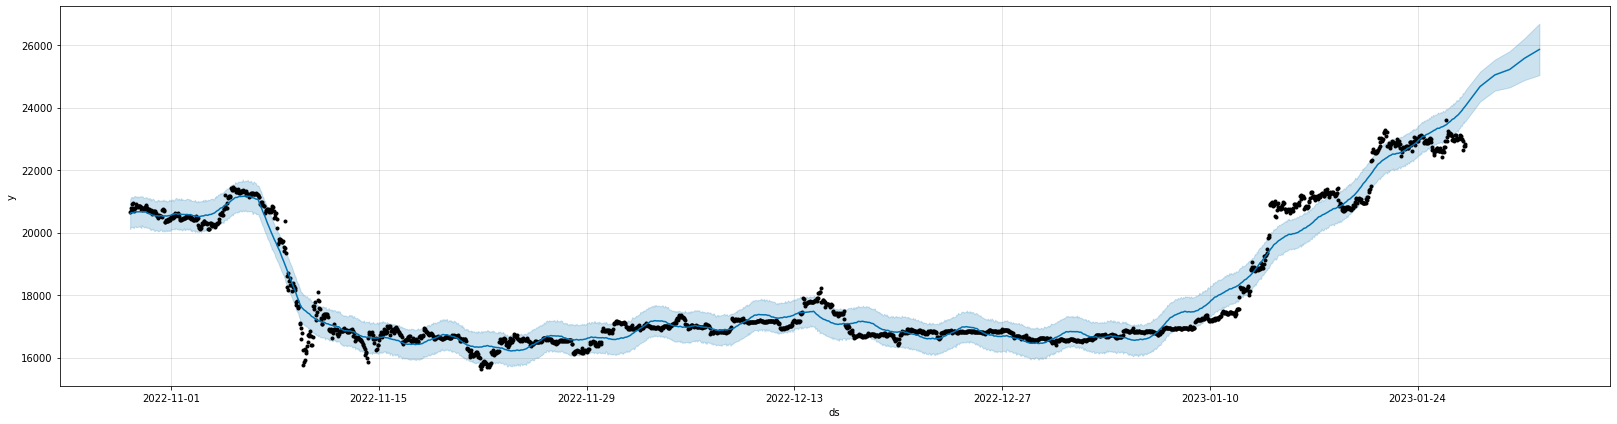

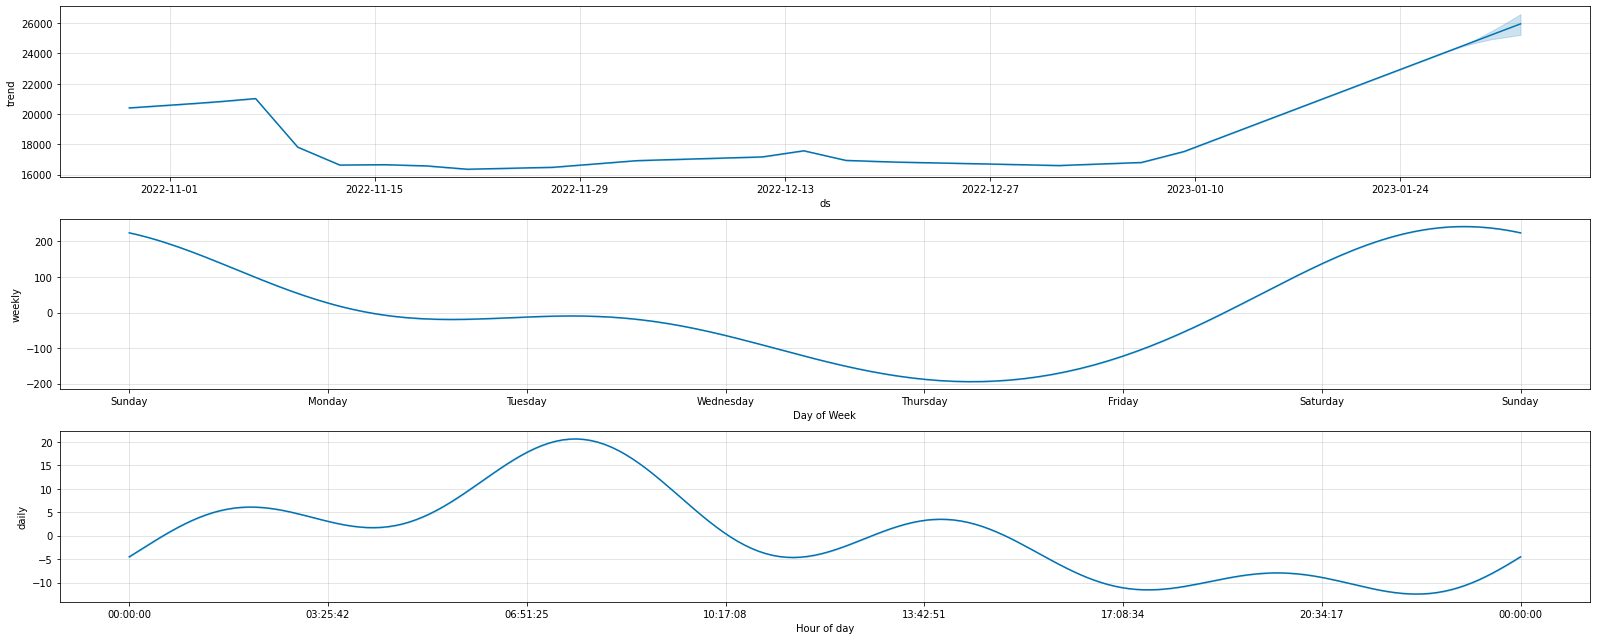

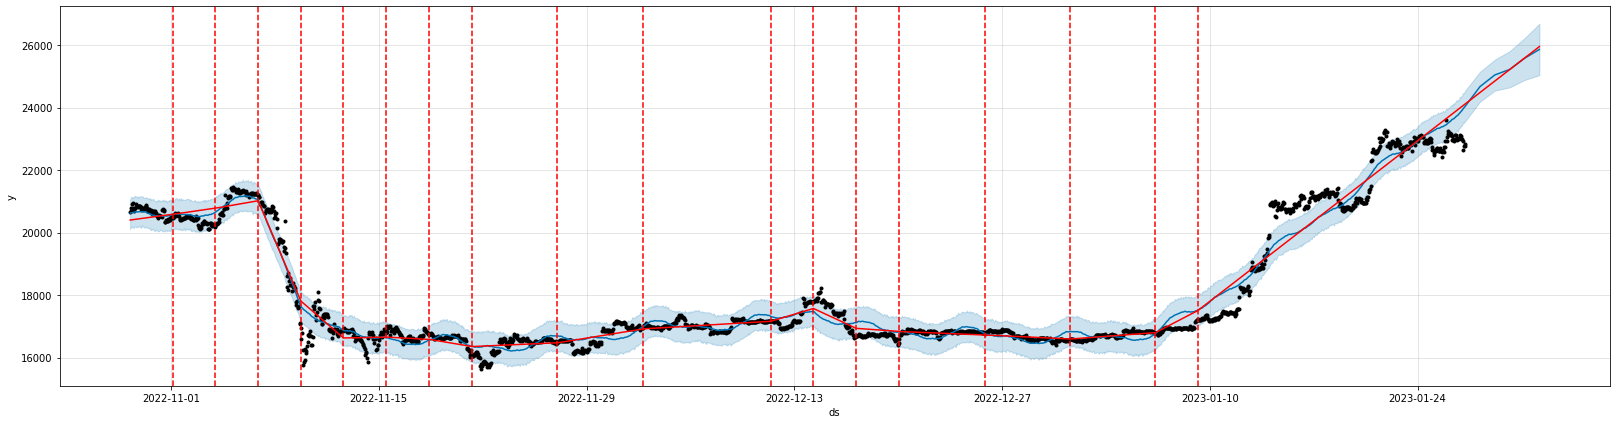

In [27]:
prophet_model(PAIR_DIC["BTC"][1])

'DATA_SOURCE: ./out/ETHUSDT.pkl'

11:38:55 - cmdstanpy - INFO - Chain [1] start processing
11:38:57 - cmdstanpy - INFO - Chain [1] done processing


,ds
2160,2023-01-28 04:59:59.999
2161,2023-01-29 04:59:59.999
2162,2023-01-30 04:59:59.999
2163,2023-01-31 04:59:59.999
2164,2023-02-01 04:59:59.999


,ds,yhat,yhat_lower,yhat_upper
2160,2023-01-28 04:59:59.999,1732.137650,1686.925362,1779.187488
2161,2023-01-29 04:59:59.999,1746.369584,1697.644168,1797.267979
2162,2023-01-30 04:59:59.999,1751.353377,1696.000549,1809.671583
2163,2023-01-31 04:59:59.999,1776.250848,1708.097318,1843.798828
2164,2023-02-01 04:59:59.999,1785.012643,1705.491105,1864.713141


(<prophet.forecaster.Prophet at 0x126b8eb20>,
                           ds
 0    2022-10-29 05:59:59.999
 1    2022-10-29 06:59:59.999
 2    2022-10-29 07:59:59.999
 3    2022-10-29 08:59:59.999
 4    2022-10-29 09:59:59.999
 ...                      ...
 2160 2023-01-28 04:59:59.999
 2161 2023-01-29 04:59:59.999
 2162 2023-01-30 04:59:59.999
 2163 2023-01-31 04:59:59.999
 2164 2023-02-01 04:59:59.999
 
 [2165 rows x 1 columns],
                           ds        trend   yhat_lower   yhat_upper  \
 0    2022-10-29 05:59:59.999  1586.430253  1558.689854  1652.974787   
 1    2022-10-29 06:59:59.999  1586.484937  1558.666137  1655.174600   
 2    2022-10-29 07:59:59.999  1586.539622  1560.441361  1652.571306   
 3    2022-10-29 08:59:59.999  1586.594307  1555.852279  1653.676229   
 4    2022-10-29 09:59:59.999  1586.648992  1556.837316  1649.504329   
 ...                      ...          ...          ...          ...   
 2160 2023-01-28 04:59:59.999  1715.098339  1686.925362  1779.

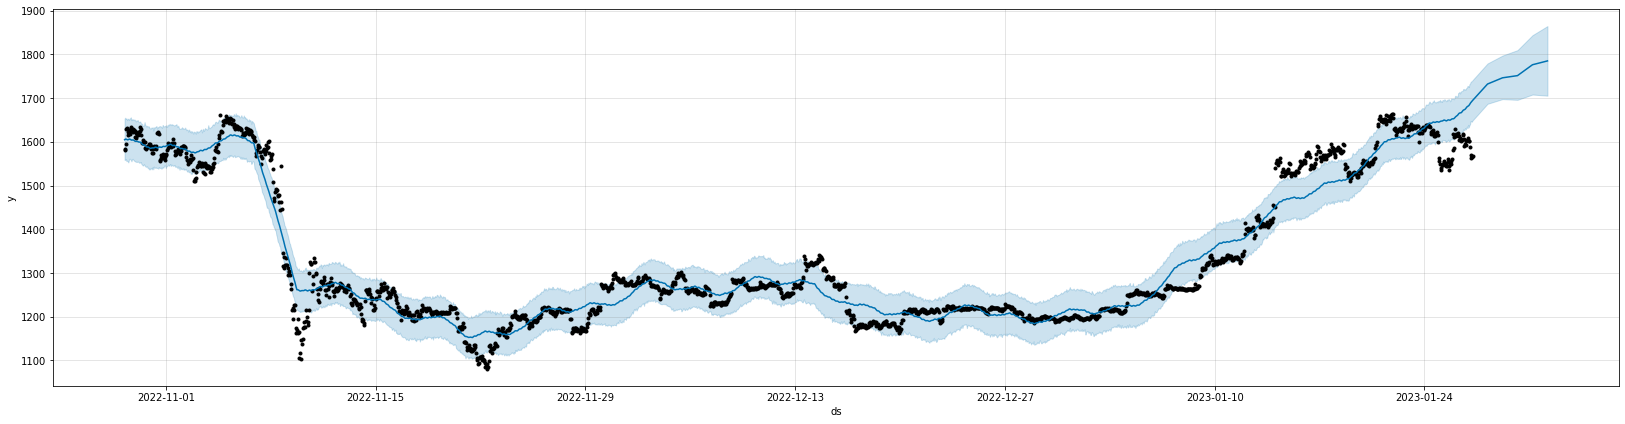

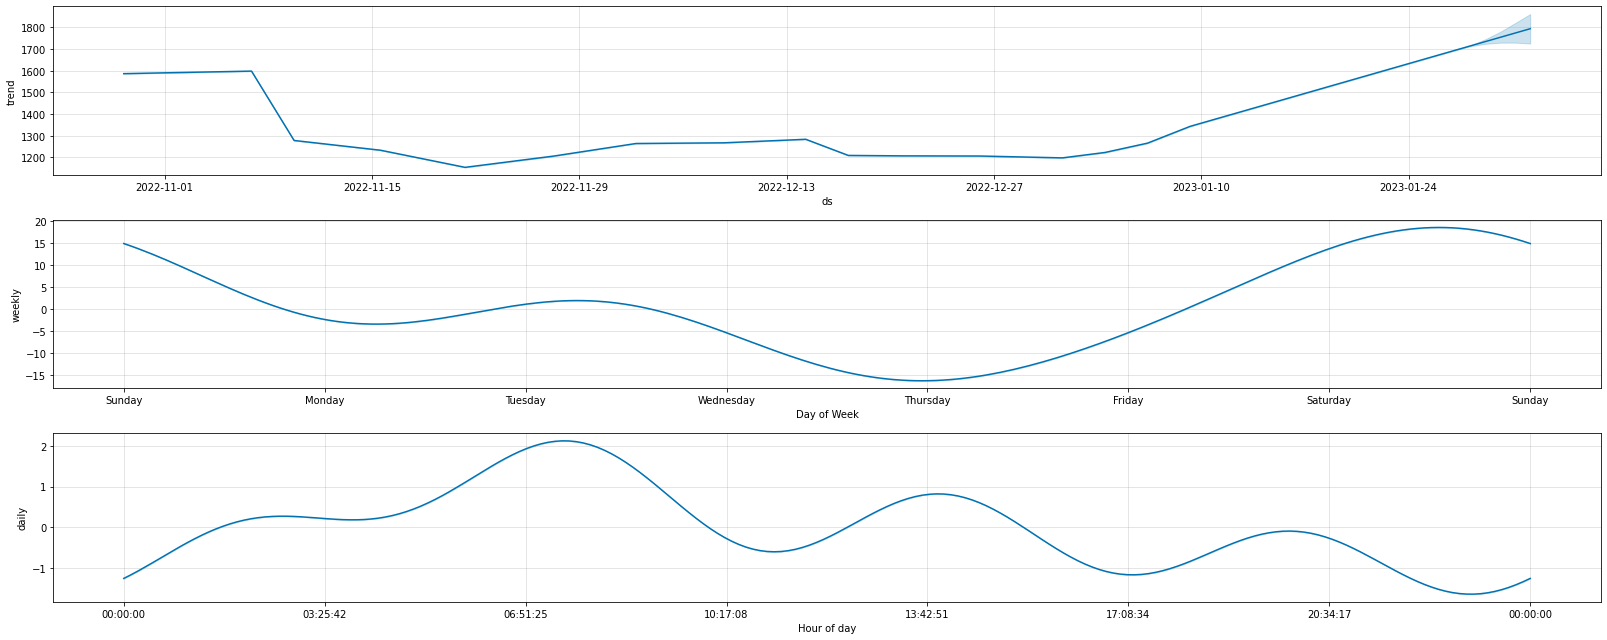

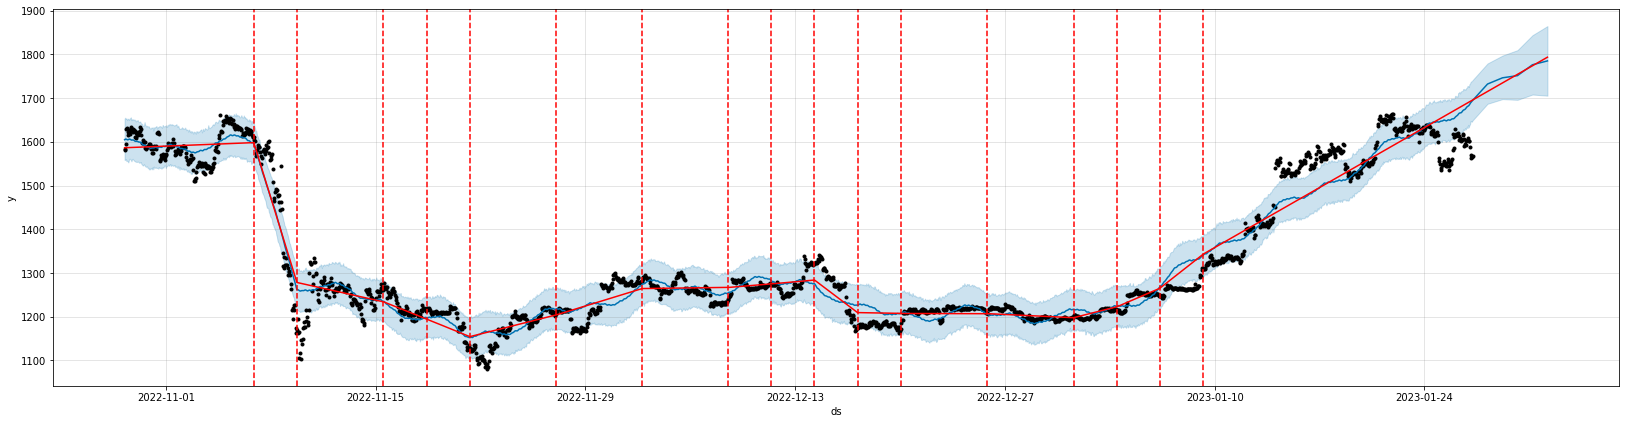

In [28]:
prophet_model(PAIR_DIC["ETH"][1])